Load the libraries below.

In [1]:
library("tidyverse")
library("jsonlite")
library("lubridate")

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   0.3.5 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘jsonlite’


The following object is masked from ‘package:purrr’:

    flatten



Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




This function `get_data` will get the new case counts over time from Utah.  

In [2]:
get_data = function() {
    
    state = "UT" # two letter state code 
    
    endpoint = paste0("https://data.cdc.gov/resource/9mfq-cb36.json?state=", state)
    
    # Can you make sense of what's happening here?👇
    df = fromJSON(url(endpoint)) %>% 
        mutate(date = as_date(submission_date),
               new_cases = as.numeric(new_case)) %>%
        select(date, new_cases, state) %>%
        arrange(date)
    
    return(df)
    
    # you can also add the chart code here
    
    }

Adjust the function above to take a state code as an argument and to set the `state` variable inside the function to the value of the argument.

Hint: here is an example of a function that just takes an argument called `state_code` and returns the value of the `state` variable.

```R
state_code_function = function(state_code) {
    
    state = state_code
    
    return(state)
    
}
```

In [3]:
get_data = function(state_code) {
    
    endpoint = paste0("https://data.cdc.gov/resource/9mfq-cb36.json?state=", 
                      state_code)
    
    # Can you make sense of what's happening here?👇
    df = fromJSON(url(endpoint)) %>% 
        mutate(date = as_date(submission_date),
               new_cases = as.numeric(new_case)) %>%
        select(date, new_cases, state) %>%
        arrange(date)
    
    return(df)
    
    }

In [4]:
get_data('NC')

date,new_cases,state
<date>,<dbl>,<chr>
2020-01-22,0,NC
2020-01-23,0,NC
2020-01-24,0,NC
2020-01-25,0,NC
2020-01-26,0,NC
2020-01-27,0,NC
2020-01-28,0,NC
2020-01-29,0,NC
2020-01-30,0,NC


Use your function to plot new cases over time for any state.

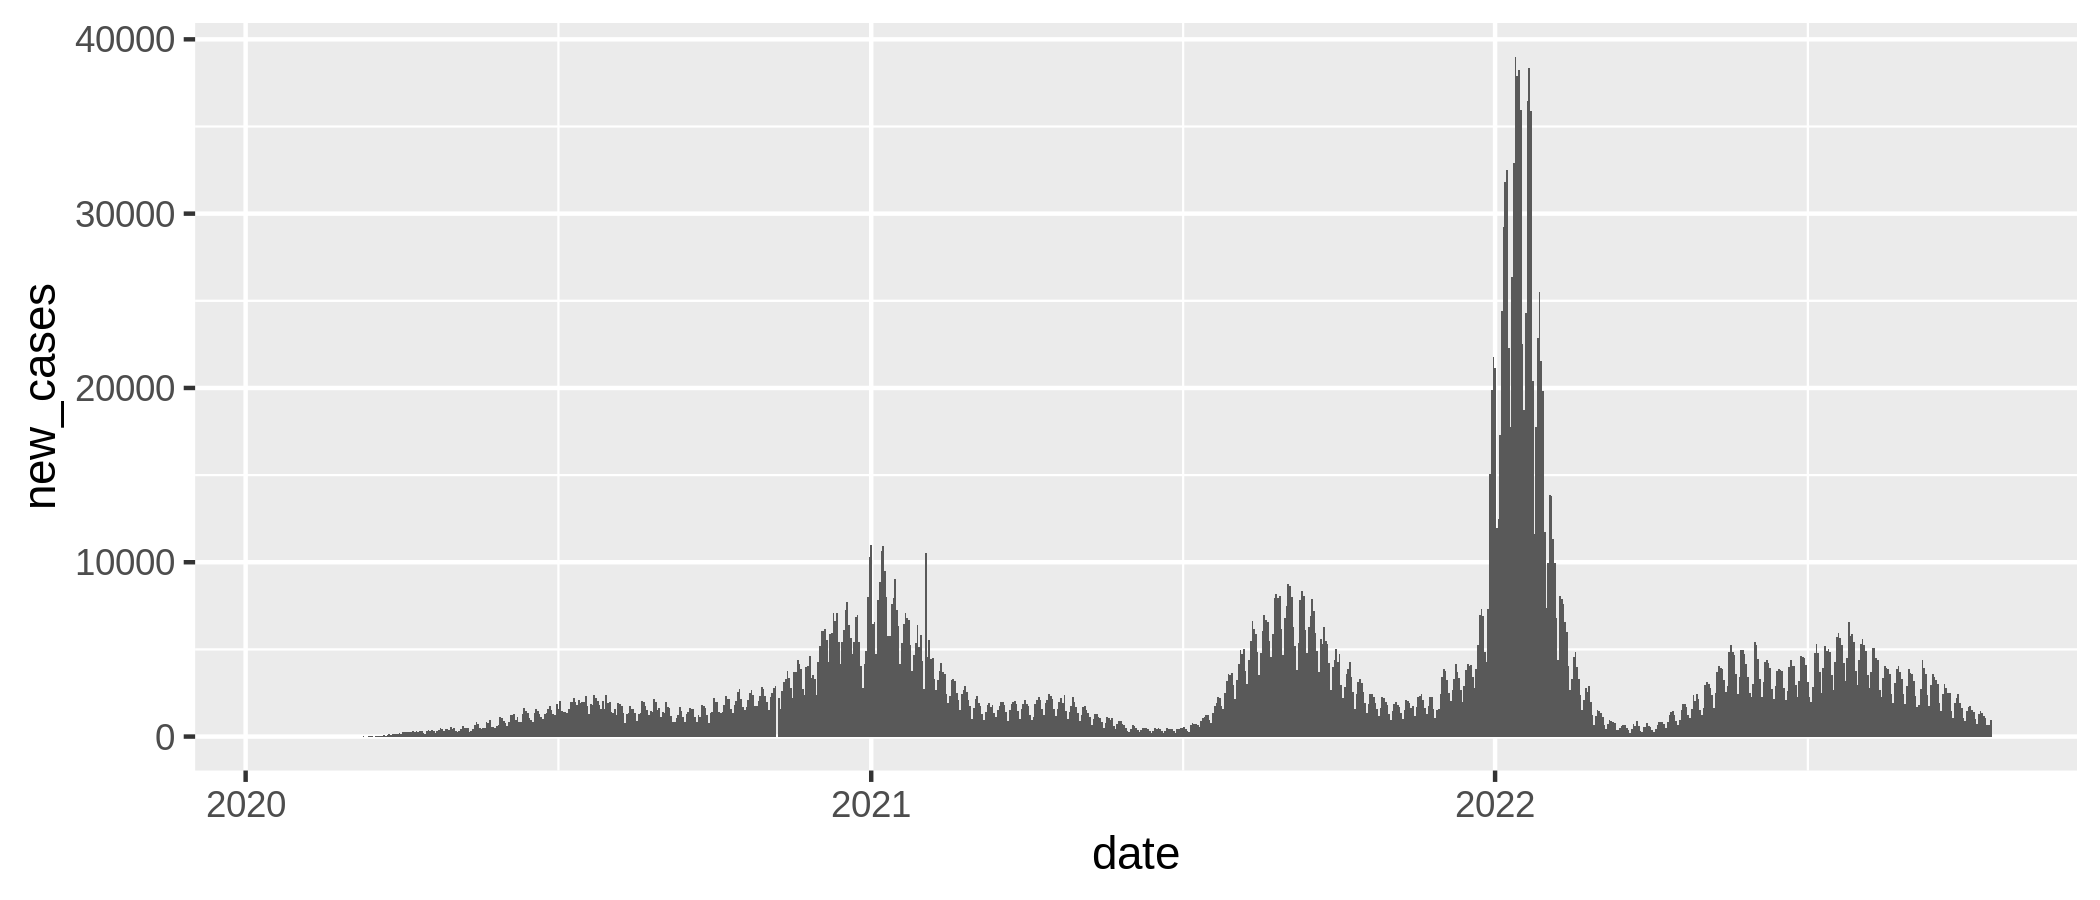

In [5]:
options(repr.plot.width=7, repr.plot.height=3, repr.plot.res=300)

df = get_data("NC")

p = ggplot(df, aes(x = date, y = new_cases)) + 
    geom_col(width = 1)

p

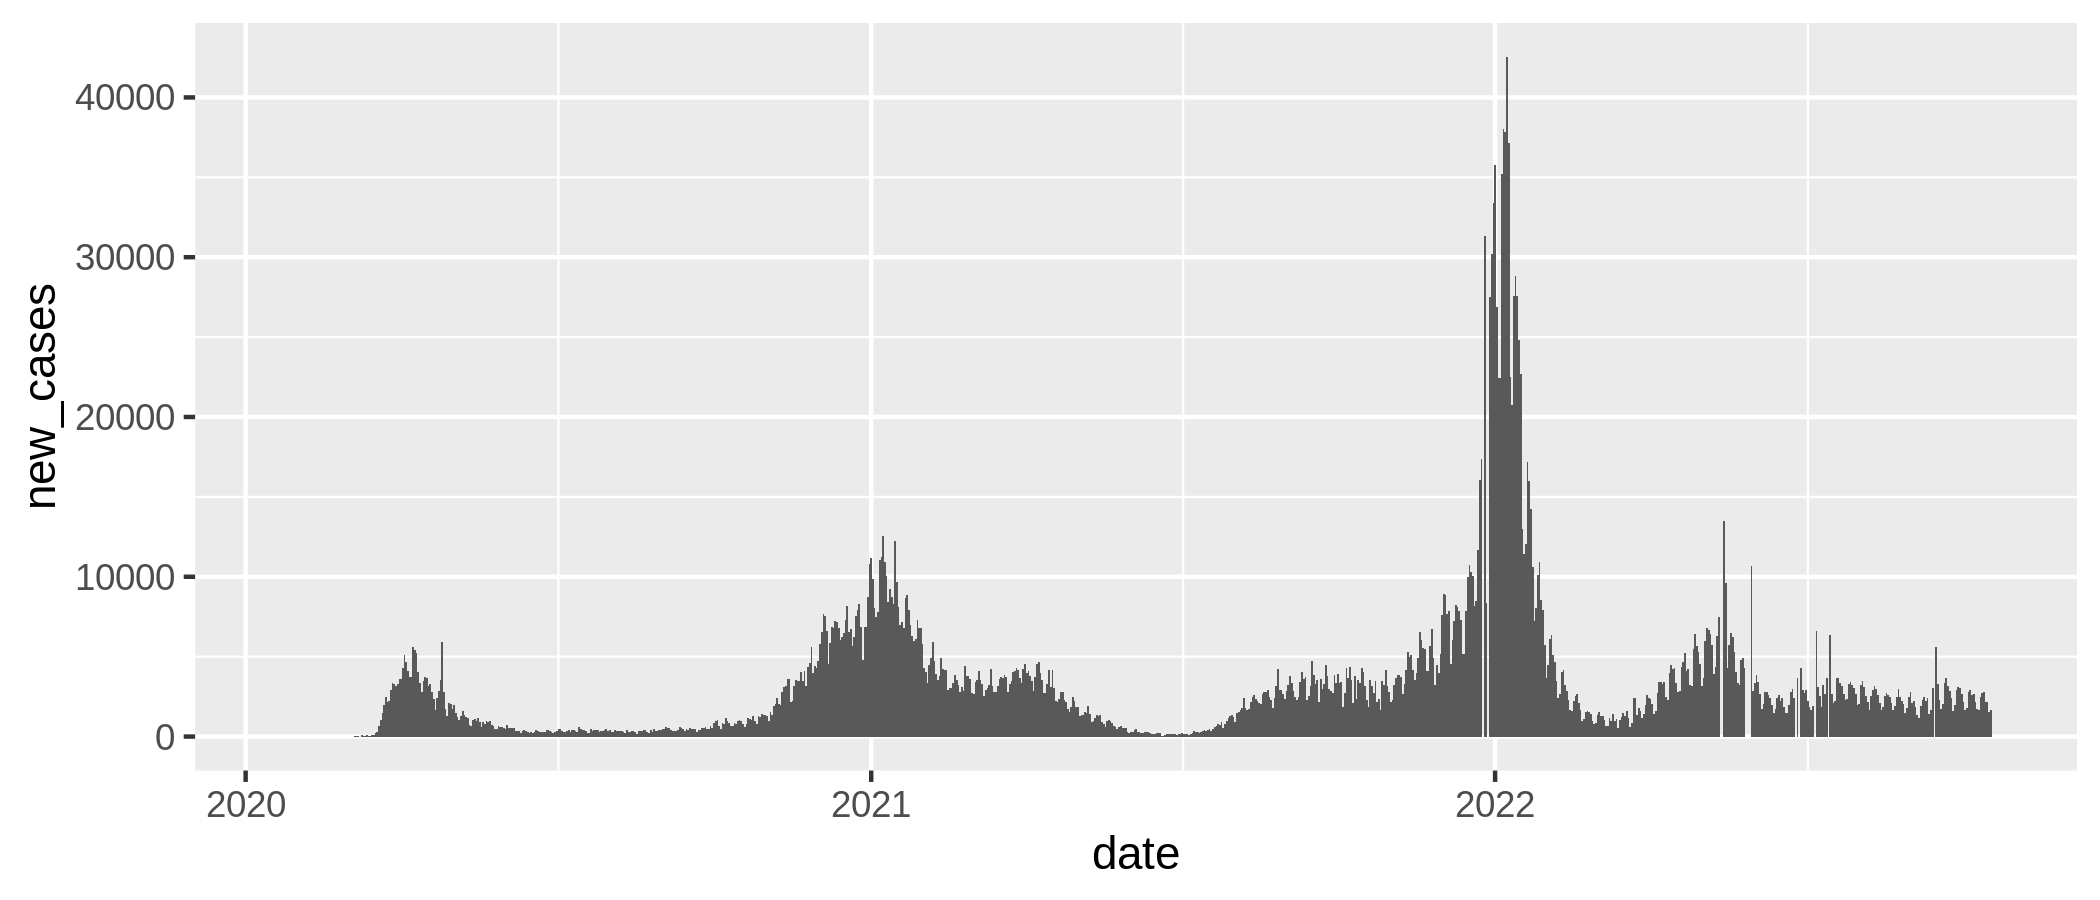

In [8]:
ny_cases = get_data('NY')

p = ggplot(ny_cases, aes(x = date, y = new_cases)) + 
    geom_col(width = 1)
p

In [9]:
ny_cases |> arrange(desc(date)) |> head()

,date,new_cases,state
,<date>,<dbl>,<chr>
1,2022-10-18,1660,NY
2,2022-10-17,1525,NY
3,2022-10-16,2186,NY
4,2022-10-15,2185,NY
5,2022-10-14,2764,NY
6,2022-10-13,2742,NY


Here's a snippet to show how this workflow should work:

```r
options(repr.plot.width=7, repr.plot.height=3, repr.plot.res=300)

df = get_data("NC")

p = ggplot(df, aes(x = date, y = new_cases)) + geom_col(width = 1)

p
```

## 🛑 STOP HERE 🛑

If you had data for multiple states in one table, what column would you use to "facet" your data by state?

Using the function you built above, capture the case data for two states in two separate tables.

E.g. for each state do something like this:

```R
df_UT = get_data("UT")
```

In [10]:
ny = get_data('NY')
nj = get_data('NJ')

We can concatenate these two tables using the `rbind` function. Read the help documentation for `rbind` to see how it works, then concatenate your two tables. 

In [11]:
nynj = rbind(ny, nj, deparse.level = 1)

nynj |> head()

,date,new_cases,state
,<date>,<dbl>,<chr>
1,2020-01-22,0,NY
2,2020-01-23,0,NY
3,2020-01-24,0,NY
4,2020-01-25,0,NY
5,2020-01-26,0,NY
6,2020-01-27,0,NY


Use `geom_bar` to confirm that you indeed have two states in your concatenated table.

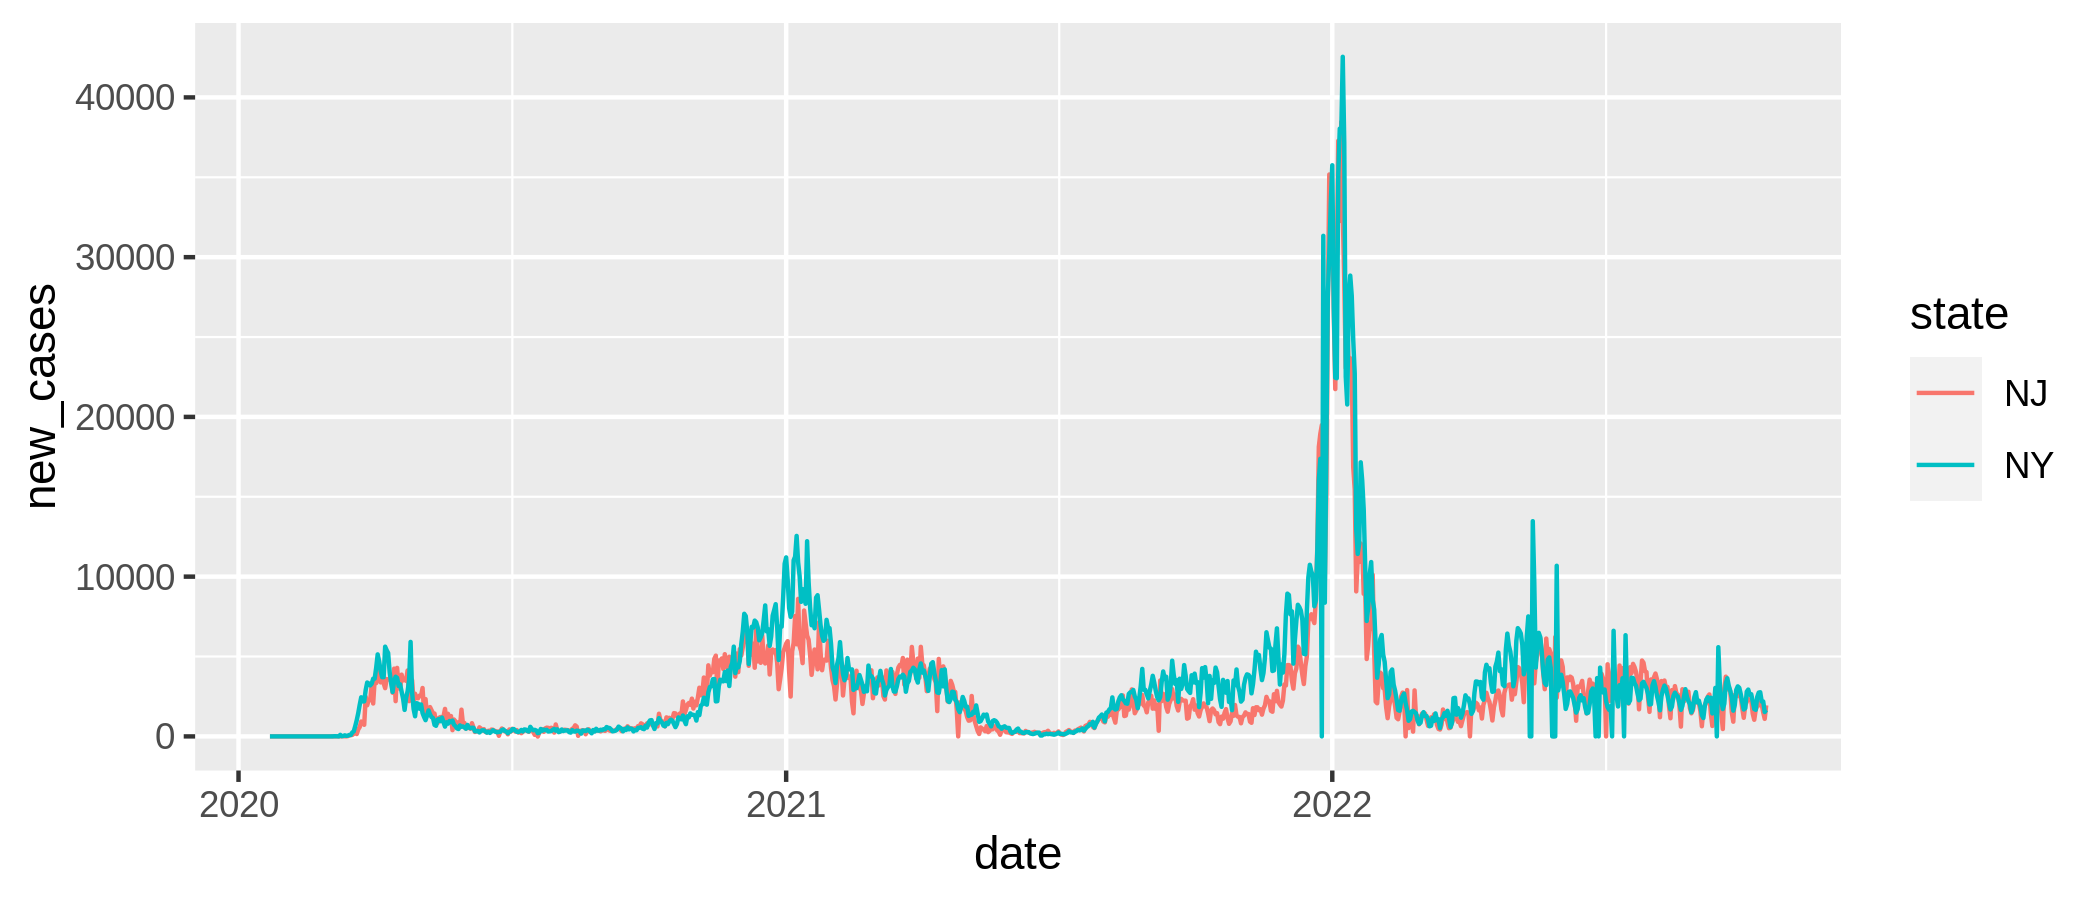

In [19]:
p = ggplot(nynj, aes(x = date, y = new_cases, color = state)) + 
    geom_line()

p

Make the new cases over time chart like we did above but this time `facet` by state.

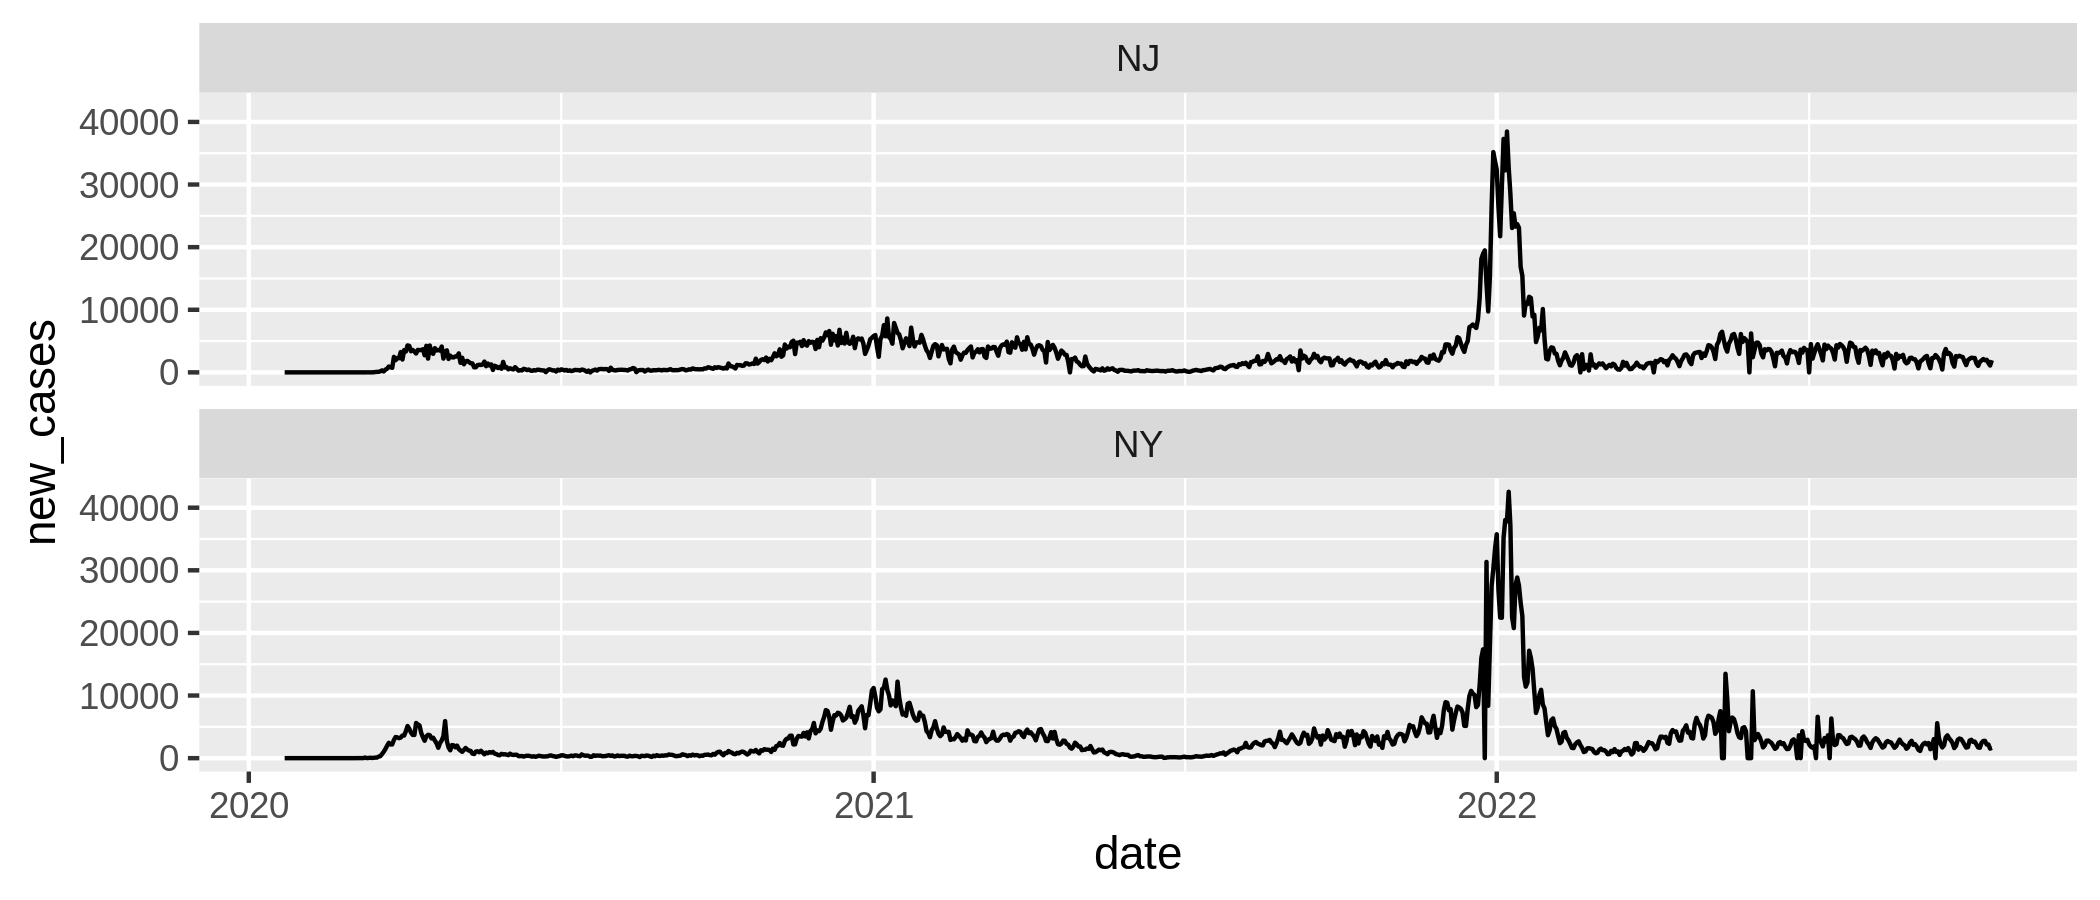

In [20]:
p = ggplot(nynj, aes(x = date, y = new_cases)) + 
    facet_wrap(~state, ncol = 1) + 
    geom_line()

p

In [15]:
nynj |> nrow()

[1] 2000

In [16]:
ny |> nrow()

[1] 1000

In [17]:
nynj |>
    group_by(state) |>
    summarize(n = n())

state,n
<chr>,<int>
NJ,1000
NY,1000
